In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

dataset = pd.read_csv('/content/drive/MyDrive/original_texture_data.csv') # importing the dataset
df = pd.DataFrame(dataset)
X = df.drop('Class', axis=1)
Y = df['Class']
print(dataset.head())


      V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -1.223 -0.798 -0.867 -0.639 -0.545 -0.412 -0.795 -0.629 -0.547 -0.868  ...   
1 -1.410 -1.029 -1.013 -0.895 -0.762 -0.676 -1.043 -0.851 -0.775 -1.037  ...   
2 -1.107 -0.649 -0.629 -0.492 -0.367 -0.298 -0.682 -0.478 -0.395 -0.681  ...   
3 -1.270 -0.855 -0.958 -0.707 -0.619 -0.469 -0.872 -0.705 -0.620 -0.988  ...   
4 -1.331 -0.862 -0.761 -0.689 -0.498 -0.361 -0.857 -0.600 -0.496 -0.779  ...   

     V32    V33    V34    V35    V36    V37    V38    V39    V40  Class  
0 -0.766 -0.555 -0.714 -0.545 -0.587 -0.871 -0.620 -0.568 -0.607      5  
1 -0.919 -0.770 -0.847 -0.663 -0.723 -1.013 -0.748 -0.698 -0.817      5  
2 -0.692 -0.445 -0.588 -0.371 -0.368 -0.746 -0.457 -0.379 -0.469      5  
3 -0.829 -0.719 -0.774 -0.617 -0.688 -0.937 -0.693 -0.657 -0.779      5  
4 -0.861 -0.571 -0.784 -0.545 -0.562 -0.952 -0.642 -0.578 -0.648      5  

[5 rows x 41 columns]


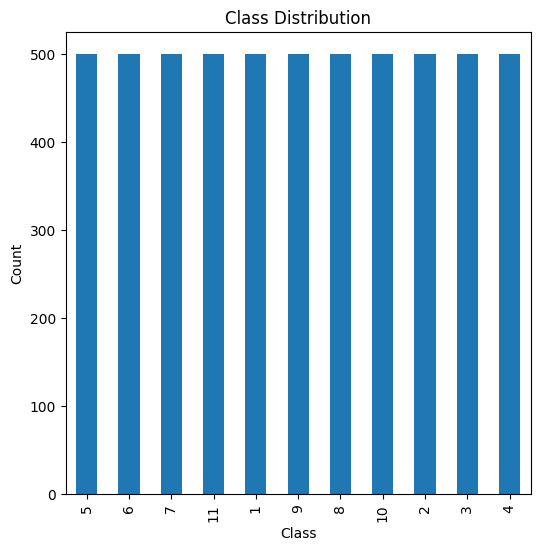

In [43]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(6, 6))
class_counts.plot(kind='bar') # Class distribution of dataset
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # splitting the dataset

In [45]:
class NaiveBayes : # Designing the Naive Bayes classifier
  def __init__(self) :
    self.classes = None
    self.priorProb = {}   # store prior probability of each class
    self.likelihoods = {} # store mean and variance of  each feature
    self.num_features = None

  def fit(self, X, Y) :
    X = np.array(X)
    Y = np.array(Y)
    self.classes = np.unique(Y)
    self.num_features = X.shape[1] #Number of features
    self.priorProb = self.calculate_prob(Y)
    self.likelihoods = self.calculate_likelihoods(X, Y)

  def calculate_prob(self, Y) :
    classes, counts = np.unique(Y, return_counts=True)
    return dict(zip(classes, counts/len(Y)))

  def calculate_likelihoods(self, X, Y) :
    likelihoods = {cls: {} for cls in self.classes}
    for cls in self.classes :
      X_cls = X[Y == cls] # select all sample of the class cls
      for f in range(self.num_features) :
        likelihoods[cls][f] ={
            'mean': X_cls[:, f].mean(), # mean of f
            'var' : X_cls[:, f].var()  # variance of f
        }
    return likelihoods

  def pdf(self, x, mean, var) : # Probability Density Function
    coeff = 1.0 / np.sqrt(2 * np.pi * var)
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return coeff * exponent

  def predict_single(self, x) :
    final_prob = []
    for cls in self.classes :
      prior = np.log(self.priorProb[cls])
      likelihood = 0
      for f in range(self.num_features) :
        mean = self.likelihoods[cls][f]['mean']
        var = self.likelihoods[cls][f]['var']
        likelihood += np.log(self.pdf(x[f], mean, var))
      final_prob.append(prior + likelihood)
    return self.classes[np.argmax(final_prob)] # return class with max probability

  def predict(self, X) :
    return np.array([self.predict_single(x) for x in X])

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
nb_classifier = NaiveBayes()
nb_classifier.fit(X_train, Y_train)

Y_val_pred = nb_classifier.predict(X_train)
val_accuracy = accuracy_score(Y_train, Y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

Validation Accuracy: 0.78


In [48]:
Y_pred = nb_classifier.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred, average='weighted')
rec = recall_score(Y_test, Y_pred, average='weighted')
cm = confusion_matrix(Y_test, Y_pred)

print("Gaussian Naive Bayes Custom") # Checking the results of the function
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print("Confusion Matrix:")
print(cm)

Gaussian Naive Bayes Custom
Accuracy:  0.7727
Precision: 0.7740
Recall:    0.7727
Confusion Matrix:
[[ 60   0   0  14   0   0   0  34   0   8   0]
 [  0 106   0   0   1   0   0   0   0   0   0]
 [  2   0  79   2   0   0   0   0   0   0   0]
 [  8   0   0  63   0  15   0   1   0   7   1]
 [  0   0   0   3  68   3  15   0   0   3  15]
 [  1   1   0  14   8  81   1   0   0   0   1]
 [  0   0   0   0   2   0 112   0   0   0   0]
 [  3   0   0   5   0   0   0  86   0   2   1]
 [  0   0   0   0   0   0   0   0  97   0   0]
 [ 25   0   0  12   2   0   0   2   0  56   3]
 [  2   0   0   7  16   2   3   0   0   5  42]]


In [49]:
gnb = GaussianNB() #Scikit library function
gnb.fit(X_train, Y_train)
Y_pred_gnb = gnb.predict(X_test)

In [50]:
acc_gnb = accuracy_score(Y_test, Y_pred_gnb)
prec_gnb = precision_score(Y_test, Y_pred_gnb, average='weighted')
rec_gnb = recall_score(Y_test, Y_pred_gnb, average='weighted')
cm_gnb = confusion_matrix(Y_test, Y_pred_gnb)

print("Gaussian Naive Bayes (scikit-learn)")
print(f"Accuracy: {acc_gnb:.4f}")
print(f"Precision: {prec_gnb:.4f}")
print(f"Recall: {rec_gnb:.4f}")
print("Confusion Matrix:")
print(cm_gnb)

Gaussian Naive Bayes (scikit-learn)
Accuracy: 0.7727
Precision: 0.7740
Recall: 0.7727
Confusion Matrix:
[[ 60   0   0  14   0   0   0  34   0   8   0]
 [  0 106   0   0   1   0   0   0   0   0   0]
 [  2   0  79   2   0   0   0   0   0   0   0]
 [  8   0   0  63   0  15   0   1   0   7   1]
 [  0   0   0   3  68   3  15   0   0   3  15]
 [  1   1   0  14   8  81   1   0   0   0   1]
 [  0   0   0   0   2   0 112   0   0   0   0]
 [  3   0   0   5   0   0   0  86   0   2   1]
 [  0   0   0   0   0   0   0   0  97   0   0]
 [ 25   0   0  12   2   0   0   2   0  56   3]
 [  2   0   0   7  16   2   3   0   0   5  42]]


In [51]:
print("\nClassification Report (Custom):\n", classification_report(Y_test, Y_pred))
print("\nClassification Report (Sklearn):\n", classification_report(Y_test, Y_pred_gnb))



Classification Report (Custom):
               precision    recall  f1-score   support

           1       0.59      0.52      0.55       116
           2       0.99      0.99      0.99       107
           3       1.00      0.95      0.98        83
           4       0.53      0.66      0.59        95
           5       0.70      0.64      0.67       107
           6       0.80      0.76      0.78       107
           7       0.85      0.98      0.91       114
           8       0.70      0.89      0.78        97
           9       1.00      1.00      1.00        97
          10       0.69      0.56      0.62       100
          11       0.67      0.55      0.60        77

    accuracy                           0.77      1100
   macro avg       0.77      0.77      0.77      1100
weighted avg       0.77      0.77      0.77      1100


Classification Report (Sklearn):
               precision    recall  f1-score   support

           1       0.59      0.52      0.55       116
         

We observe that both the function's give the same results, hence our code is a good illustration of Gaussian Naive Bayes Function.